<a href="https://colab.research.google.com/github/michaeledge27/mathModeling/blob/main/projects/gamblingSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
wheel_spin = random.randint(0, 37)

In [18]:
if wheel_spin < 1 or wheel_spin > 36:     # wheel spin is a 0 or 37
    wheel_spin = 'green'
elif wheel_spin >= 1 and wheel_spin <= 18:  # wheel spin is between 1 and 18 inclusive
    wheel_spin = 'red'
elif wheel_spin >= 19 and wheel_spin <= 36:  # wheel spin is between 19 and 36 inclusive
    wheel_spin = 'black'

In [19]:
bet = ['red', 1]    # make bet on red for $1

In [20]:
loss_counter = 0    # keep track of losses

In [21]:
if wheel_spin == bet[0]:
    print('win')
else:
    loss_counter += 1
    bet[1] *= 2   # double your bet
    #spin wheel again and bet

In [22]:
def spin_wheel():
    wheel_spin = random.randint(0, 37)
    if wheel_spin < 1 or wheel_spin > 36:     # wheel spin is a 0 or 37
        color = 'green'
    elif wheel_spin >= 1 and wheel_spin <= 18:  # wheel spin is between 1 and 18 inclusive
        color = 'red'
    elif wheel_spin >= 19 and wheel_spin <= 36:  # wheel spin is between 19 and 36 inclusive
        color = 'black'
    return color

In [23]:
spin_wheel()

'black'

In [24]:
def bet_on(bet_color, max_attempts, max_bet_limit):
    bet_amount = 1
    loss_counter = 0
    win = False
    for _ in range(max_attempts):
        spin_color = spin_wheel()
        # The bet hits
        if bet_color == spin_color:
            win = True
            return bet_amount, loss_counter
        # The bet does not hit
        else:
            # Keep track of losses

            loss_counter += 1
            # Double the bet amount
            bet_amount *= 2
            if bet_amount > max_bet_limit:
                return bet_amount, loss_counter

    return bet_amount, loss_counter

In [25]:
def run_simulation(num_trials, max_attempts, max_bet_limit):
    bet_amounts = []
    loss_counters = []
    for _ in range(num_trials):
        bet_amount, loss_counter = bet_on('green', max_attempts, max_bet_limit)
        bet_amounts.append(bet_amount)
        loss_counters.append(loss_counter)
    return bet_amounts, loss_counters

In [26]:
num_trials = 100000
max_attempts = 1000
max_bet_limit = 1024
bet_amounts, loss_counters = run_simulation(num_trials, max_attempts, max_bet_limit)

In [27]:
wins = [bet for bet in bet_amounts if bet <= 1024]
losses = [bet for bet in bet_amounts if bet > 1024]
loss_percentage = (len(losses) / num_trials) * 100

In [28]:
print(f"Number of wins: {len(wins)}")
print(f"Number of losses: {len(losses)}")
print(f"Loss percentage: {loss_percentage:.2f}%")
print(f"Maximum bet: {max(bet_amounts)}")
print(f"Maximum losses before winning: {max(loss_counters)}")
print(f"Average bet: {np.mean(bet_amounts):.2f}")
print(f"Average losses before winning: {np.mean(loss_counters):.2f}")

Number of wins: 44586
Number of losses: 55414
Loss percentage: 55.41%
Maximum bet: 2048
Maximum losses before winning: 11
Average bet: 1200.21
Average losses before winning: 8.08


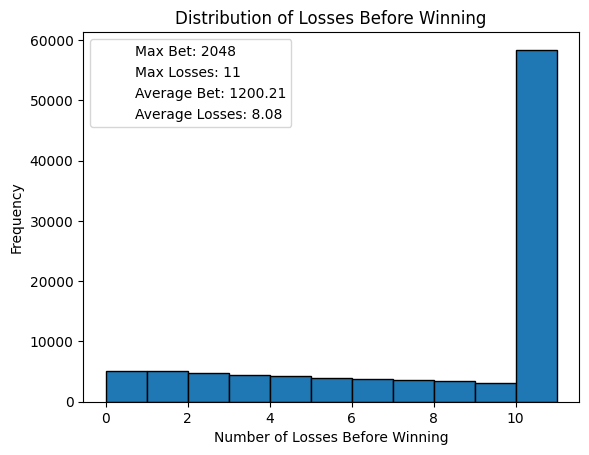

In [29]:
stats_text = [f"Max Bet: {max(bet_amounts)}", f"Max Losses: {max(loss_counters)}", f"Average Bet: {np.mean(bet_amounts):.2f}", f"Average Losses: {np.mean(loss_counters):.2f}"]
plt.hist(loss_counters, bins=range(max(loss_counters) + 1), edgecolor='black')
plt.xlabel('Number of Losses Before Winning')
plt.ylabel('Frequency')
plt.title('Distribution of Losses Before Winning')
plt.plot([], [], ' ', label=stats_text[0])
plt.plot([], [], ' ', label=stats_text[1])
plt.plot([], [], ' ', label=stats_text[2])
plt.plot([], [], ' ', label=stats_text[3])
plt.legend()
plt.show()

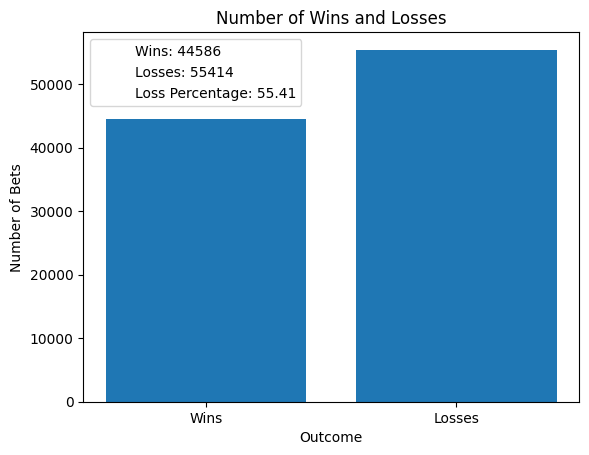

In [30]:
stats_text = [f"Wins: {len(wins)}", f"Losses: {len(losses)}", f"Loss Percentage: {loss_percentage:.2f}"]
plt.bar(['Wins', 'Losses'], [len(wins), len(losses)])
plt.xlabel('Outcome')
plt.ylabel('Number of Bets')
plt.title('Number of Wins and Losses')
plt.plot([], [], ' ', label=stats_text[0])
plt.plot([], [], ' ', label=stats_text[1])
plt.plot([], [], ' ', label=stats_text[2])
plt.legend()
plt.show()

In [31]:
def fair_wheel_spin():
    wheel_spin = random.randint(1, 36)
    if wheel_spin >= 1 and wheel_spin <= 18:  # wheel spin is between 1 and 18 inclusive
        color = 'red'
    elif wheel_spin >= 19 and wheel_spin <= 36:  # wheel spin is between 19 and 36 inclusive
        color = 'black'
    return color

In [32]:
def fair_bet_on(bet_color, max_attempts, max_bet_limit):
    bet_amount = 1
    loss_counter = 0
    win = False
    for _ in range(max_attempts):
        spin_color = fair_wheel_spin()
        # The bet hits
        if bet_color == spin_color:
            win = True
            return bet_amount, loss_counter
        # The bet does not hit
        else:
            # Keep track of losses
            loss_counter += 1
            # Double the bet amount
            bet_amount *= 2
            if bet_amount > max_bet_limit:
                return bet_amount, loss_counter

    return bet_amount, loss_counter

In [33]:
def fair_run_simulation(num_trials, max_attempts, max_bet_limit):
    bet_amounts = []
    loss_counters = []
    for _ in range(num_trials):
        bet_amount, loss_counter = fair_bet_on('red', max_attempts, max_bet_limit)
        bet_amounts.append(bet_amount)
        loss_counters.append(loss_counter)
    return bet_amounts, loss_counters

In [34]:
num_trials = 100000
max_attempts = 1000
max_bet_limit = 1024
bet_amounts, loss_counters = fair_run_simulation(num_trials, max_attempts, max_bet_limit)

In [35]:
wins = [bet for bet in bet_amounts if bet <= 1024]
losses = [bet for bet in bet_amounts if bet > 1024]
loss_percentage = (len(losses) / num_trials) * 100

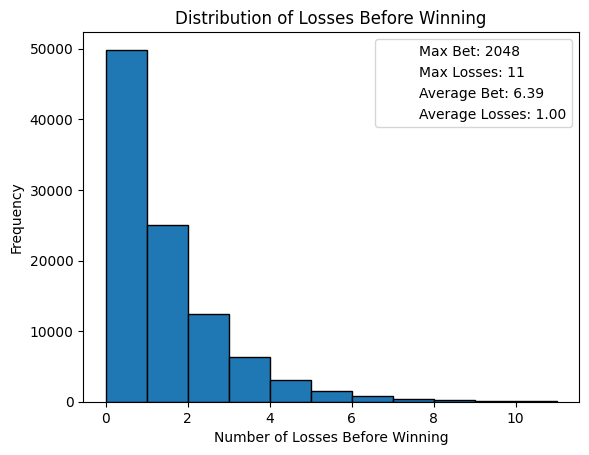

In [36]:
stats_text = [f"Max Bet: {max(bet_amounts)}", f"Max Losses: {max(loss_counters)}", f"Average Bet: {np.mean(bet_amounts):.2f}", f"Average Losses: {np.mean(loss_counters):.2f}"]
plt.hist(loss_counters, bins=range(max(loss_counters) + 1), edgecolor='black')
plt.xlabel('Number of Losses Before Winning')
plt.ylabel('Frequency')
plt.title('Distribution of Losses Before Winning')
plt.plot([], [], ' ', label=stats_text[0])
plt.plot([], [], ' ', label=stats_text[1])
plt.plot([], [], ' ', label=stats_text[2])
plt.plot([], [], ' ', label=stats_text[3])
plt.legend()
plt.show()

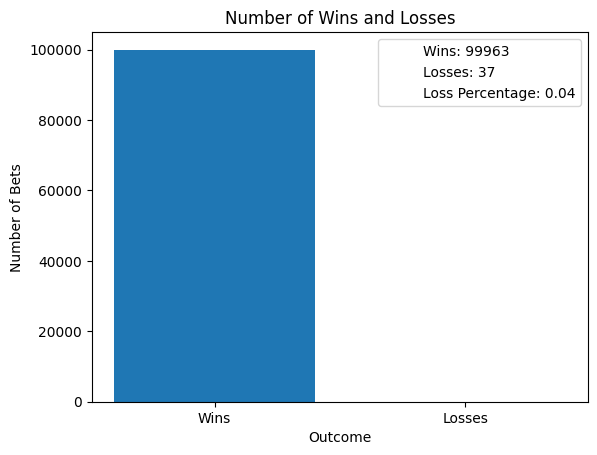

In [37]:
stats_text = [f"Wins: {len(wins)}", f"Losses: {len(losses)}", f"Loss Percentage: {loss_percentage:.2f}"]
plt.bar(['Wins', 'Losses'], [len(wins), len(losses)])
plt.xlabel('Outcome')
plt.ylabel('Number of Bets')
plt.title('Number of Wins and Losses')
plt.plot([], [], ' ', label=stats_text[0])
plt.plot([], [], ' ', label=stats_text[1])
plt.plot([], [], ' ', label=stats_text[2])
plt.legend()
plt.show()